<h1 align='center'><strong>Machine Learning</strong></h1>
<h1 align='center'>Aplicación: Selección de método de envío.</h1>

---

<h3 align='center'><u>Introducción:</u></h3>

Para la aplicación Web que nos ayudará a determinar el método de envío apto para cada producto, empezaremos por agrupar nuestros datos con la ayuda del modelo de clusterización K-Means, el objetivo es justamente agrupar nuestros productos según sus características dimensionales (Altura, anchura y largo) y utilizar ese agrupamiento junto con otras características tales como peso y puntos de partida y llegada del envío.

---

<h3 align='center'><u>Primeros pasos:</u></h3>

#### ◦ Comenzamos la creación de nuestro modelo importando las librerías y módulos a utilizar.

In [19]:
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import plot_tree

#### ◦ Creo mi dataframe llamado "df_logistic" con los datos del archivo .csv anteriormente solicitado al área de Engineering y hago un pequeño análisis general de mis datos para corroborar que los mismos estén limpios y completos.

In [3]:
df_logistic = pd.read_csv("datasets\\ML_logistic_table.csv", delimiter = ',', encoding = "utf-8")
df_logistic.head(5)

,seller_zip_code_prefix,seller_city,seller_state,customer_zip_code_prefix,customer_city,customer_state,product_weight_g,product_height_cm,product_length_cm,product_width_cm
0,9080,santo andre,SP,35490,entre rios de minas,MG,11800.0,43.0,40.0,36.0
1,9080,santo andre,SP,38600,paracatu,MG,11800.0,43.0,40.0,36.0
2,9080,santo andre,SP,87502,umuarama,PR,11800.0,43.0,40.0,36.0
3,29156,cariacica,ES,11431,guaruja,SP,9000.0,12.0,42.0,39.0
4,29156,cariacica,ES,8671,suzano,SP,9050.0,12.0,39.0,42.0


In [4]:
df_logistic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112632 entries, 0 to 112631
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   seller_zip_code_prefix    112632 non-null  int64  
 1   seller_city               112632 non-null  object 
 2   seller_state              112632 non-null  object 
 3   customer_zip_code_prefix  112632 non-null  int64  
 4   customer_city             112632 non-null  object 
 5   customer_state            112632 non-null  object 
 6   product_weight_g          112632 non-null  float64
 7   product_height_cm         112632 non-null  float64
 8   product_length_cm         112632 non-null  float64
 9   product_width_cm          112632 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 8.6+ MB


---

<h3 align='center'><u>Modelo de Clusterización: K-Means</u></h3>

#### ◦ Instanciamos nuestro modelo con 5 clusters, una semilla o 'random_state' predefinida y las columnas a evaluar para agrupar los datos, aquí hay 2 cosas para remarcar:

+ 1.- Como ya se comentó en el readme introductorio si bien este es un informe detallado sobre las decisiones y el desarrollo de los modelos de Machine Learning, a modo de resumen y para que el informe sea más limpio, únicamente estoy incluyendo los modelos en su versión final, esto quiere decir que ni las columnas elegidas para el agrupamiento ni el número de clusters seleccionados son aleatorios, fueron decisiones tomadas en base a los resultados deseados luego de varias pruebas con distintos hiperparámetros y características, el caso en particular de los clusters lo detallaré más adelante en el Notebook.

+ 2.- A diferencia del número de Clusters o columnas, la semilla o 'random_state' sí es un número elegido de forma aleatoria, decido pasar este parámetro para que al replicar el modelo, el output sea siempre el mismo basándose en su semilla.

In [5]:
# Creo una instancia del algoritmo KMeans con 5 clusters.
kmeans = KMeans(n_clusters=5, random_state=735328913)

# Selecciono las columnas que se utilizaré para agrupar los datos.
X = df_logistic[['product_height_cm','product_length_cm','product_width_cm']]

# Ajusto el modelo con los datos
kmeans.fit(X)

# Asigno las etiquetas de cluster a cada producto.
df_logistic['cluster'] = kmeans.labels_

# Verifico la correcta creación de la columna 'cluster' y su valor asignado a cada producto.
df_logistic.sample(5)

,seller_zip_code_prefix,seller_city,seller_state,customer_zip_code_prefix,customer_city,customer_state,product_weight_g,product_height_cm,product_length_cm,product_width_cm,cluster
87754,9015,santo andre,SP,11040,santos,SP,100.0,15.0,20.0,15.0,0
68763,5141,pirituba,SP,22720,rio de janeiro,RJ,3650.0,15.0,60.0,15.0,1
41750,12952,atibaia,SP,13478,americana,SP,3900.0,25.0,65.0,25.0,3
39089,13456,santa barbara d'oeste,SP,18120,mairinque,SP,950.0,20.0,55.0,22.0,1
73895,6180,osasco,SP,39185,sao goncalo do rio preto,MG,231.0,13.0,18.0,14.0,0


In [6]:
# Reviso el conteo de cluster asignados a mis datos para darme una idea general de la distribución de los grupos.
df_logistic.cluster.value_counts()

0    58833
1    22222
4    18624
3     6653
2     6300
Name: cluster, dtype: int64

In [92]:
# Utilizo plotly para crear un gráfico de dispersión 3D que me ayude a visualizar la distribución de mis grupos.
fig = px.scatter_3d(df_logistic, x='product_width_cm', y='product_length_cm', z='product_height_cm', color='cluster', color_continuous_scale='Viridis')

# Muestro el gráfico utilizando plotly.io, que me entrega el output en un .html interactivo para un mejor entendimiento de mi gráfico.
# Este archivo .html se encuentra en graphs/cluster_scatter3d.html
pio.write_html(fig, file='graphs/cluster_scatter3d.html', auto_open=True)

#### ◦ Como sabemos, K-Means es un algoritmo de agrupamiento no supervisado, ideal para nuestro caso en el que no tenemos datos sobre el método de envío, sin embargo, si queremos que nuestros resultados sean aplicables a la realidad, debemos inferir en los mismos mínimamente para así conseguir datos de calidad que sirvan para buscar implementar soluciones a la problemática planteada, por ello, si bien el modelo se instanció desde un principio con 5 clusters, fusionaremos algunos de estos clusters para dividir nuestros datos en 3 grupos en lugar de 5, y así obtener la distribución deseada:

#### ◦ ¿Y por qué no instanciar el modelo con 3 clusters desde un inicio? Simplemente porque, al dividir la totalidad de nuestros datos en únicamente 3 grupos, el modelo busca patrones más generales que hacen que las distribuciones varíen, haciendo que obtengamos resultados ilógicos como por ejemplo, que un paquete cuyas dimensiones son de 10cm x 10cm x 10cm debería pertenecer al grupo de productos 'Grande' y que uno de dimensiones 20cm x 15cm x 20 cm pertenece al grupo 'Chico'.

<img width="550" height="460" src="graphs\5 clusters.png">

In [7]:
# Creo una copia de mi dataframe df_logistic al cual denomino df_shipping, esto es sólo a modo de buena práctica.
df_shipping = df_logistic.copy()
df_shipping.head(5)

,seller_zip_code_prefix,seller_city,seller_state,customer_zip_code_prefix,customer_city,customer_state,product_weight_g,product_height_cm,product_length_cm,product_width_cm,cluster
0,9080,santo andre,SP,35490,entre rios de minas,MG,11800.0,43.0,40.0,36.0,2
1,9080,santo andre,SP,38600,paracatu,MG,11800.0,43.0,40.0,36.0,2
2,9080,santo andre,SP,87502,umuarama,PR,11800.0,43.0,40.0,36.0,2
3,29156,cariacica,ES,11431,guaruja,SP,9000.0,12.0,42.0,39.0,1
4,29156,cariacica,ES,8671,suzano,SP,9050.0,12.0,39.0,42.0,1


In [8]:
# Creo una nueva columna con el tamaño del producto.
df_shipping['product_size'] = ''

# Asigno el tamaño del producto a cada objeto según su cluster, aquí es donde fusiono los cluster con el fin de obtener una distribución más lógica y real.
df_shipping.loc[df_shipping['cluster'] == 0, 'product_size'] = 'Chico'
df_shipping.loc[df_shipping['cluster'] == 1, 'product_size'] = 'Mediano'
df_shipping.loc[df_shipping['cluster'] == 2, 'product_size'] = 'Grande'
df_shipping.loc[df_shipping['cluster'] == 3, 'product_size'] = 'Grande'
df_shipping.loc[df_shipping['cluster'] == 4, 'product_size'] = 'Mediano'

# Elimino la columna cluster de este dataframe.
df_shipping = df_shipping.drop(columns=['cluster'])

# Verifico el resultado.
df_shipping

,seller_zip_code_prefix,seller_city,seller_state,customer_zip_code_prefix,customer_city,customer_state,product_weight_g,product_height_cm,product_length_cm,product_width_cm,product_size
0,9080,santo andre,SP,35490,entre rios de minas,MG,11800.0,43.0,40.0,36.0,Grande
1,9080,santo andre,SP,38600,paracatu,MG,11800.0,43.0,40.0,36.0,Grande
2,9080,santo andre,SP,87502,umuarama,PR,11800.0,43.0,40.0,36.0,Grande
3,29156,cariacica,ES,11431,guaruja,SP,9000.0,12.0,42.0,39.0,Mediano
4,29156,cariacica,ES,8671,suzano,SP,9050.0,12.0,39.0,42.0,Mediano
...,...,...,...,...,...,...,...,...,...,...,...
112627,13070,campinas,SP,21941,rio de janeiro,RJ,400.0,16.0,16.0,16.0,Chico
112628,13070,campinas,SP,29060,vitoria,ES,1403.0,36.0,29.0,33.0,Mediano
112629,13070,campinas,SP,35170,coronel fabriciano,MG,1403.0,36.0,29.0,33.0,Mediano
112630,13070,campinas,SP,18285,cesario lange,SP,100.0,17.0,17.0,17.0,Chico


In [122]:
# Utilizo plotly para crear un gráfico de dispersión 3D que me ayude a visualizar la distribución de mis grupos.
fig = px.scatter_3d(df_shipping, x='product_width_cm', y='product_length_cm', z='product_height_cm', color='product_size')

# Muestro el gráfico utilizando plotly.io, que me entrega el output en un .html interactivo para un mejor entendimiento de mi gráfico.
# Este archivo .html se encuentra en graphs/shipping_scatter3d.html
pio.write_html(fig, file='graphs/shipping_scatter3d.html', auto_open=True)

#### ◦ Como se puede observar, el gráfico general es el mismo, solo que ahora se encuentran fusionados los clusters 1 y 4 en el grupo 'Mediano' y por otro lado, los clusters 2 y 3 en el grupo 'Grande'. En este gráfico se puede evidenciar el objetivo deseado por el modelo de K-Means, agrupar todo mi conjunto de datos en 3 grupos según el tamaño de mi producto evaluado por altura, anchura y largo.

<img width="550" height="460" src="graphs/product_size.png">

---

<h3 align='center'><u>Testeo del modelo:</u></h3>

#### ◦ Voy a inventar datos y pasárselos a mi modelo K-Means para ver qué grupo/cluster le asigna a cada conjunto y verificar que los resultados sean positivos, cabe recalcar que aplicar métricas para calcular el rendimiento del modelo (tales como inercia, silueta media o pureza) no sería adecuado ya que nosotros instanciamos el modelo con 5 clusters pero nos quedamos únicamente con 3 luego de hacer una fusión.

#### ◦ Recordemos lo que representa cada cluster:
+ Cluster 0 ==> product_size 'Chico'
+ Cluster 1, 4 ==> product_size 'Mediano'
+ Cluster 2, 3 ==> product_size 'Grande'

#### Envío un dataframe creado a partir de un array con datos inventados para ver las predicciones/asignaciones del modelo y corroborar que los resultados sean lógicos y aplicables a un caso real.

In [35]:
# Creo una lista con los valores inventados para cada columna.

#0 chico 1, 4 mediano 2, 3 grande

invented_data = np.array([[20, 20, 20], [30, 30, 50], [100, 250, 30]]) #height, lenght y wifdth respectivamente.

# Creo un nuevo dataframe utilizando los valores inventados
df_invented = pd.DataFrame(invented_data, columns=X.columns)

cluster_asignado = kmeans.predict(df_invented)
print(f"El elemento de dimensiones {invented_data[0]} fue enviado al grupo '{cluster_asignado[0]}' o 'Chico'\nEl elemento de dimensiones {invented_data[1]} fue enviado al grupo '{cluster_asignado[1]}' o 'Mediano'\nEl elemento de dimensiones {invented_data[2]} fue enviado al grupo '{cluster_asignado[2]}' o 'Grande'")

El elemento de dimensiones [20 20 20] fue enviado al grupo '0' o 'Chico'
El elemento de dimensiones [30 30 50] fue enviado al grupo '4' o 'Mediano'
El elemento de dimensiones [100 250  30] fue enviado al grupo '3' o 'Grande'


---

<h3 align='center'><u>Método de envío: Características a tener en cuenta para la aplicación del modelo.</u></h3>

#### ◦ Ya pudimos agrupar nuestros productos por tamaño con ayuda de K-Means, ahora resta aplicar esos resultados a nuestro dataset y definir el método de envío a utilizar, sin embargo, el método de envío no depende únicamente del tamaño del paquete, sino que también depende del peso del mismo y el punto de salida y llegada.

#### Definimos el método de envío utilizando las siguientes reglas:

+ Bicicleta: El producto debe ser 'Chico', no debe pesar más de 8kg y el envío debe ser dentro de la misma zona (Mismo zip_code para seller y customer).
+ Moto: El producto debe ser 'Chico' o 'Mediano', no debe pesar más de 15kg y el envío debe ser dentro de la misma ciudad sin importar zip_code.
+ Camioneta: El producto puede ser 'Chico', 'Mediano' y 'Grande, no debe pesar más de 75kg y el envío debe ser dentro del mismo estado, sin importar ciudad.
+ Camión: El producto puede ser 'Chico', 'Mediano' y 'Grande' y el envío debe ser entre distintos estados.

In [223]:
# Creo una nueva columna con el método de envío
df_shipping['shipping_method'] = ''

# Asigno el método de envío a cada objeto según su tamaño, peso y punto de salida-llegada.
df_shipping.loc[(df_shipping['product_size'] == 'Chico') & (df_shipping['product_weight_g'] >= 0) & (df_shipping['product_weight_g'] <= 8000) & (df_shipping['seller_zip_code_prefix'] == df_shipping['customer_zip_code_prefix']), 'shipping_method'] = 'Bicicleta'
df_shipping.loc[(df_shipping['product_size'].isin(['Chico', 'Mediano'])) & (df_shipping['product_weight_g'] <= 15000) & (df_shipping['seller_city'] == df_shipping['customer_city']) & (df_shipping['shipping_method'] != 'Bicicleta'), 'shipping_method'] = 'Moto'
df_shipping.loc[(df_shipping['product_weight_g'] <= 75000) & (df_shipping['seller_state'] == df_shipping['customer_state']) & (df_shipping['shipping_method'] != 'Bicicleta') & (df_shipping['shipping_method'] != 'Moto'), 'shipping_method'] = 'Camioneta'
df_shipping.loc[(df_shipping['seller_state'] != df_shipping['customer_state']) & (df_shipping['shipping_method'] != 'Bicicleta') & (df_shipping['shipping_method'] != 'Moto') & (df_shipping['shipping_method'] != 'Camioneta'), 'shipping_method'] = 'Camion'

# Verifico el resultado
df_shipping.head(5)

,seller_zip_code_prefix,seller_city,seller_state,customer_zip_code_prefix,customer_city,customer_state,product_weight_g,product_height_cm,product_length_cm,product_width_cm,product_size,shipping_method
0,9080,santo andre,SP,35490,entre rios de minas,MG,11800.0,43.0,40.0,36.0,Grande,Camion
1,9080,santo andre,SP,38600,paracatu,MG,11800.0,43.0,40.0,36.0,Grande,Camion
2,9080,santo andre,SP,87502,umuarama,PR,11800.0,43.0,40.0,36.0,Grande,Camion
3,29156,cariacica,ES,11431,guaruja,SP,9000.0,12.0,42.0,39.0,Mediano,Camion
4,29156,cariacica,ES,8671,suzano,SP,9050.0,12.0,39.0,42.0,Mediano,Camion


#### ◦ Realizo un pequeño análisis para tener un paneo de mis resultados.

In [224]:
# Reviso el conteo de métodos de envío asignados a mis datos para darme una idea general de la distribución de los grupos.
df_shipping.shipping_method.value_counts()

Camion       71868
Camioneta    35363
Moto          5389
Bicicleta       12
Name: shipping_method, dtype: int64

In [225]:
# Imprimo una pequeña muestra de mi dataframe filtrado por shipping_method == 'Bicicleta'.
df_shipping.loc[(df_shipping['shipping_method']=='Bicicleta')].sample(5)

,seller_zip_code_prefix,seller_city,seller_state,customer_zip_code_prefix,customer_city,customer_state,product_weight_g,product_height_cm,product_length_cm,product_width_cm,product_size,shipping_method
20484,35570,formiga,MG,35570,formiga,MG,600.0,10.0,20.0,15.0,Chico,Bicicleta
51938,89560,videira,SC,89560,videira,SC,525.0,16.0,16.0,18.0,Chico,Bicicleta
23189,89218,joinville,SC,89218,joinville,SC,350.0,2.0,16.0,12.0,Chico,Bicicleta
95359,90010,porto alegre,RS,90010,porto alegre,RS,250.0,6.0,16.0,13.0,Chico,Bicicleta
6335,80230,curitiba,PR,80230,curitiba,PR,434.0,16.0,20.0,18.0,Chico,Bicicleta


In [226]:
# Imprimo una pequeña muestra de mi dataframe filtrado por shipping_method == 'Moto'.
df_shipping.loc[(df_shipping['shipping_method']=='Moto')].sample(10)

,seller_zip_code_prefix,seller_city,seller_state,customer_zip_code_prefix,customer_city,customer_state,product_weight_g,product_height_cm,product_length_cm,product_width_cm,product_size,shipping_method
30414,3573,sao paulo,SP,4752,sao paulo,SP,550.0,15.0,25.0,15.0,Chico,Moto
25235,3550,sao paulo,SP,4144,sao paulo,SP,475.0,11.0,18.0,16.0,Chico,Moto
30496,3573,sao paulo,SP,4576,sao paulo,SP,238.0,12.0,17.0,15.0,Chico,Moto
72771,2030,sao paulo,SP,4636,sao paulo,SP,2000.0,20.0,16.0,11.0,Chico,Moto
48521,7152,guarulhos,SP,7135,guarulhos,SP,683.0,14.0,20.0,17.0,Chico,Moto
17131,8250,sao paulo,SP,2422,sao paulo,SP,100.0,3.0,19.0,11.0,Chico,Moto
106704,3564,sao paulo,SP,4514,sao paulo,SP,240.0,10.0,18.0,14.0,Chico,Moto
81680,3237,sao paulo,SP,4313,sao paulo,SP,100.0,6.0,18.0,11.0,Chico,Moto
76708,3702,sao paulo,SP,5588,sao paulo,SP,5350.0,10.0,30.0,17.0,Chico,Moto
56608,2016,sao paulo,SP,4960,sao paulo,SP,300.0,6.0,16.0,20.0,Chico,Moto


In [227]:
# Imprimo una pequeña muestra de mi dataframe filtrado por shipping_method == 'Camioneta'.
df_shipping.loc[(df_shipping['shipping_method']=='Camioneta')].sample(10)

,seller_zip_code_prefix,seller_city,seller_state,customer_zip_code_prefix,customer_city,customer_state,product_weight_g,product_height_cm,product_length_cm,product_width_cm,product_size,shipping_method
28024,3059,sao paulo,SP,19600,rancharia,SP,15800.0,47.0,62.0,32.0,Grande,Camioneta
4077,13205,jundiai,SP,13050,campinas,SP,600.0,11.0,60.0,11.0,Mediano,Camioneta
5670,7031,guarulhos,SP,4195,sao paulo,SP,16550.0,65.0,22.0,40.0,Grande,Camioneta
6447,14315,batatais,SP,13290,louveira,SP,150.0,6.0,20.0,15.0,Chico,Camioneta
73409,11450,vicente de carvalho,SP,5687,sao paulo,SP,200.0,11.0,28.0,14.0,Chico,Camioneta
7412,3204,sao paulo,SP,13450,santa barbara d'oeste,SP,850.0,25.0,20.0,20.0,Mediano,Camioneta
101298,4476,sao paulo,SP,11040,santos,SP,200.0,5.0,17.0,12.0,Chico,Camioneta
30616,27277,volta redonda,SP,9541,sao caetano do sul,SP,1100.0,9.0,53.0,32.0,Mediano,Camioneta
24716,14940,ibitinga,SP,6730,vargem grande paulista,SP,350.0,9.0,25.0,19.0,Chico,Camioneta
92450,14940,ibitinga,SP,3205,sao paulo,SP,2250.0,20.0,35.0,30.0,Mediano,Camioneta


In [228]:
# Imprimo una pequeña muestra de mi dataframe filtrado por shipping_method == 'Camion'.
df_shipping.loc[(df_shipping['shipping_method']=='Camion')].sample(10)

,seller_zip_code_prefix,seller_city,seller_state,customer_zip_code_prefix,customer_city,customer_state,product_weight_g,product_height_cm,product_length_cm,product_width_cm,product_size,shipping_method
39832,72015,brasilia,DF,11667,caraguatatuba,SP,100.0,7.0,16.0,11.0,Chico,Camion
12067,14940,ibitinga,SP,83420,quatro barras,PR,250.0,10.0,16.0,16.0,Chico,Camion
49000,31255,belo horizonte,MG,78095,cuiaba,MT,900.0,51.0,18.0,35.0,Grande,Camion
43161,25645,petropolis,RJ,12294,cacapava,SP,426.0,14.0,18.0,14.0,Chico,Camion
22886,87015,maringa,PR,3817,sao paulo,SP,900.0,33.0,30.0,30.0,Mediano,Camion
10184,12940,atibaia,SP,86730,astorga,PR,50.0,10.0,17.0,15.0,Chico,Camion
54645,85802,cascavel,PR,17380,brotas,SP,2525.0,4.0,88.0,87.0,Grande,Camion
63128,7112,guarulhos,SP,30285,belo horizonte,MG,5950.0,11.0,65.0,65.0,Grande,Camion
10826,14085,ribeirao preto,SP,84061,ponta grossa,PR,407.0,17.0,20.0,18.0,Chico,Camion
54323,80310,curitiba,PR,55340,aguas belas,PE,3000.0,11.0,69.0,11.0,Grande,Camion


<h3 align='center'><strong>Disclaimer</strong></h3>

#### ◦ Hasta acá llega la parte del modelo que fue utilizada para el uso de la aplicación, sin embargo, abajo de este disclaimer se encuentra el informe y análisis de un intento de implementación de un modelo de Clasificación para predecir el método de envío que debería utilizar un nuevo producto.

---

---

<h3 align='center'><u>Modelo de Clasificación: Árbol de decisión</u></h3>

#### ◦ El siguiente paso es predecir cuál es el método de envío que debería aplicarse para un producto según sus dimensiones, peso y lugar de salida-llegada, para ello, utilizaremos un Árbol de decisión ya que es un modelo ideal para nuestro caso en el cual contamos con datos no muy complejos, varias características a evaluar y un buen número de datos. Además, es un modelo fácil de entender y parametrizar.
#### Primero, para poder tener en cuenta los puntos de salida y llegada del envío, crearemos 3 columnas, que funcionaran a modo de "delta" para zip_code, city y state, indicando con un 1 si coinciden en ambos casos y con un 0 si no lo hacen. Además, cambio los valores de mi columna product_size por números para evitar manejar variables categóricas.

In [239]:
# Creo una copia de mi dataframe llamada df_shipping_le haciendo referencia a Label Encoder, esto es únicamente a modo de buena práctica.
df_shipping_le = df_shipping.copy()

In [240]:
# Cambio los valores de mi columna "product_size" por números para no tener problemas a la hora de intentar crear un modelo con variables categóricas.
df_shipping_le.loc[(df_shipping_le['product_size'] == 'Chico'), 'product_size'] = 0
df_shipping_le.loc[(df_shipping_le['product_size'] == 'Mediano'), 'product_size'] = 1
df_shipping_le.loc[(df_shipping_le['product_size'] == 'Grande'), 'product_size'] = 2

In [241]:
# Cambio los valores de mi columna "shipping_method" por números para no tener problemas a la hora de intentar crear un modelo con variables categóricas.
#df_shipping_le.loc[(df_shipping_le['shipping_method'] == 'Bicicleta'), 'shipping_method'] = 0
#df_shipping_le.loc[(df_shipping_le['shipping_method'] == 'Moto'), 'shipping_method'] = 1
#df_shipping_le.loc[(df_shipping_le['shipping_method'] == 'Camioneta'), 'shipping_method'] = 2
#df_shipping_le.loc[(df_shipping_le['shipping_method'] == 'Camion'), 'shipping_method'] = 3

In [242]:
# Creo mis 3 columnas delta.
df_shipping_le['delta_zip_code'] = ''
df_shipping_le['delta_city'] = ''
df_shipping_le['delta_state'] = ''

# Asigno los valores 1 y 0 según corresponda a cada columna.
df_shipping_le.loc[(df_shipping_le['seller_zip_code_prefix'] == df_shipping_le['customer_zip_code_prefix']), 'delta_zip_code'] = 1
df_shipping_le.loc[(df_shipping_le['seller_zip_code_prefix'] != df_shipping_le['customer_zip_code_prefix']), 'delta_zip_code'] = 0
df_shipping_le.loc[(df_shipping_le['seller_city'] == df_shipping_le['customer_city']), 'delta_city'] = 1
df_shipping_le.loc[(df_shipping_le['seller_city'] != df_shipping_le['customer_city']), 'delta_city'] = 0
df_shipping_le.loc[(df_shipping_le['seller_state'] == df_shipping_le['customer_state']), 'delta_state'] = 1
df_shipping_le.loc[(df_shipping_le['seller_state'] != df_shipping_le['customer_state']), 'delta_state'] = 0

In [243]:
df_shipping_le.sample(10)

,seller_zip_code_prefix,seller_city,seller_state,customer_zip_code_prefix,customer_city,customer_state,product_weight_g,product_height_cm,product_length_cm,product_width_cm,product_size,shipping_method,delta_zip_code,delta_city,delta_state
20878,4733,sao paulo,SP,35680,itauna,MG,350.0,5.0,20.0,20.0,0,Camion,0,0,0
102512,11701,praia grande,SP,4358,sao paulo,SP,200.0,19.0,19.0,19.0,0,Camioneta,0,0,1
7831,3204,sao paulo,SP,89266,jaragua do sul,SC,2550.0,35.0,30.0,30.0,1,Camion,0,0,0
63204,7112,guarulhos,SP,68385,tucuma,PA,6400.0,11.0,63.0,63.0,2,Camion,0,0,0
40892,12250,monteiro lobato,SP,55028,caruaru,PE,1200.0,9.0,25.0,18.0,0,Camion,0,0,0
92415,14940,ibitinga,SP,14807,araraquara,SP,650.0,13.0,31.0,20.0,0,Camioneta,0,0,1
107941,1031,sao paulo,SP,22051,rio de janeiro,RJ,500.0,7.0,19.0,11.0,0,Camion,0,0,0
45400,5849,sao paulo,SP,66080,belem,PA,300.0,2.0,16.0,20.0,0,Camion,0,0,0
67488,26562,mesquita,RJ,7244,guarulhos,SP,7500.0,11.0,61.0,46.0,2,Camion,0,0,0
79111,18048,sorocaba,SP,8142,sao paulo,SP,16300.0,30.0,30.0,30.0,1,Camioneta,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [255]:


# Definimos X e y con los datos que nos interesan. 
# Para X utilizaremos las características dimensionales de nuestros productos. Para y, utilizaremos la columna 'product_size'
 
X = df_shipping_le[['delta_zip_code','delta_city','delta_state','product_weight_g','product_size']] 
y = df_shipping_le['shipping_method']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# Creo una instancia del modelo
clf = DecisionTreeClassifier(random_state=42, max_depth=1)

# Entreno el modelo en el conjunto de entrenamiento
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

#### Graficamos la frecuencia en nuestro conjunto de datos y verificamos que el mismo está desbalanceado, esto supone un problema y es que corremos el riesgo de que nuestro modelo sufra overfitting, sin embargo, continuaremos el análisis para ver cómo se comporta el modelo.

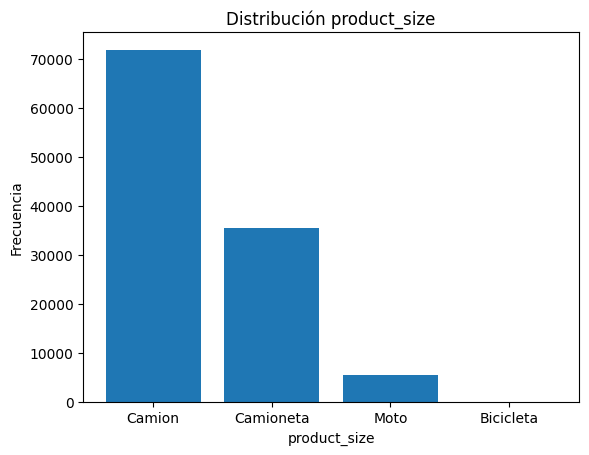

In [246]:
# Calculo la frecuencia de cada clase en el conjunto de datos
class_counts = y.value_counts()

# Creo un gráfico de barras para mostrar la distribución de las clases
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('product_size')
plt.ylabel('Frecuencia')
plt.title('Distribución product_size')
plt.show()


#### ◦ Validación cruzada para la definición de hiperparámetros del modelo.

##### Realizando una validación cruzada podemos determinar qué profundidad de árbol es la óptima para encontrar un balance entre no caer en overfitting ni sacrificar demasiado accuracy para nuestro modelo.

Accuracy para el árbol: 0.95 (+/- 0.00)
{'fit_time': array([0.10900187, 0.11199498, 0.10499334, 0.10599089, 0.10000062]), 'score_time': array([0.03300452, 0.02300549, 0.02199984, 0.0230031 , 0.02600002]), 'test_accuracy': array([0.95205753, 0.95201314, 0.9520554 , 0.9520554 , 0.9520554 ])}


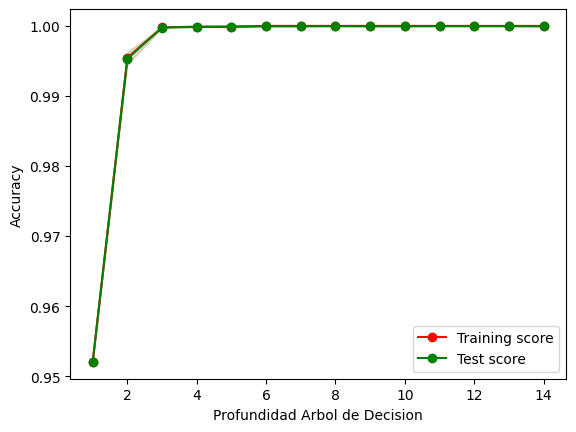

In [250]:
# Realizo una validación cruzada para determinar la profundidad óptima de mi árbol.
# Gracias al gráfico podemos deducir que la profundidad óptima para nuestro árbol de decisión es de 1, ya que así mantenemos una similitud entre el accuracy medido por nuestro y_train e y_test sin arriesgarnos tanto a un overfitting del modelo.


arbol_scores = cross_val_score(clf, X, y, cv=10)
print("Accuracy para el árbol: %0.2f (+/- %0.2f)" % (arbol_scores.mean(), arbol_scores.std() * 2))

arbol_scores = cross_validate(clf, X, y, scoring = ['accuracy'])
print(arbol_scores)
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,15,1)

for profundidad in profundidades:
    clf = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(clf, X, y, cv=2, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")


plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

#### ◦ Definimos y graficamos una matriz de confusión que nos ayude a visualizar el ratio de aciertos y errores que tuvo nuestro modelo a la hora de etiquetar el envío.

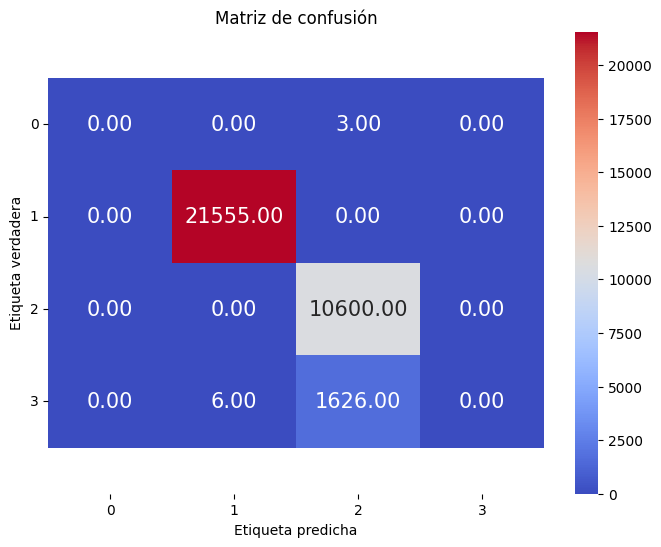

In [258]:
# Creo mi matriz de confusión

y_pred = clf.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)

def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.title('Matriz de confusión')
    plt.xlabel('Etiqueta predicha')
    plt.ylabel('Etiqueta verdadera')
    plt.xticks(rotation = 360)
    plt.yticks(rotation = 360)
    b, t = plt.ylim()
    b += 0.5
    t -= 0.5
    plt.ylim(b, t)
    plt.show()

plot_corre_heatmap(confusion_mat)

<h3 align='center'><u>Métricas de rendimiento del modelo:</u></h3>

#### Ahora calcularemos métricas para evaluar nuestro modelo, tales como el accuracy, precision y recall. Gracias a esto podremos determinar si nuestro modelo es eficaz a la hora de hacer las predicciones.

#### ◦ Accuracy Score: Proporción de aciertos de un modelo sobre el total de datos.

In [259]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(acc))

Accuracy: 0.95


#### ◦ Precision Score: Proporción de verdaderos positivos sobre el total de positivos predichos.

In [260]:
prec = precision_score(y_test, y_pred, average='weighted', zero_division=1)
print("Precision: {:.2f}".format(prec))

Precision: 0.96


#### ◦ Recall Score: Proporción de verdaderos positivos sobre el total de verdaderos positivos (incluidos los falsos negativos).

In [261]:
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall: {:.2f}".format(recall))

Recall: 0.95


---

#### ◦ Ponemos a prueba el modelo con datos inventados.

In [287]:
# Creo una lista con los valores inventados para cada columna sabiendo que el output que debería recibir es 'Bicicleta'.
invented_data = [2050,'brasilia','SP',2050,'brasilia','SP',300.0,20.0,20.0,20.0,0,'Bicicleta',0,0,1]
# Creo un nuevo dataframe utilizando los valores inventados
df_invented = pd.DataFrame([invented_data], columns=df_shipping_le.columns)

In [288]:
# Hago una prediccion utilizando los datos inventados.
prediction = clf.predict(df_invented[['delta_zip_code','delta_city','delta_state','product_weight_g','product_size']])
print(prediction)

['Camioneta']
